In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Load the Our World in Data COVID dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Preview the data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries of interest
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Keep only necessary columns
columns_needed = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
df = df[columns_needed]

# Handle missing values
df.fillna(0, inplace=True)


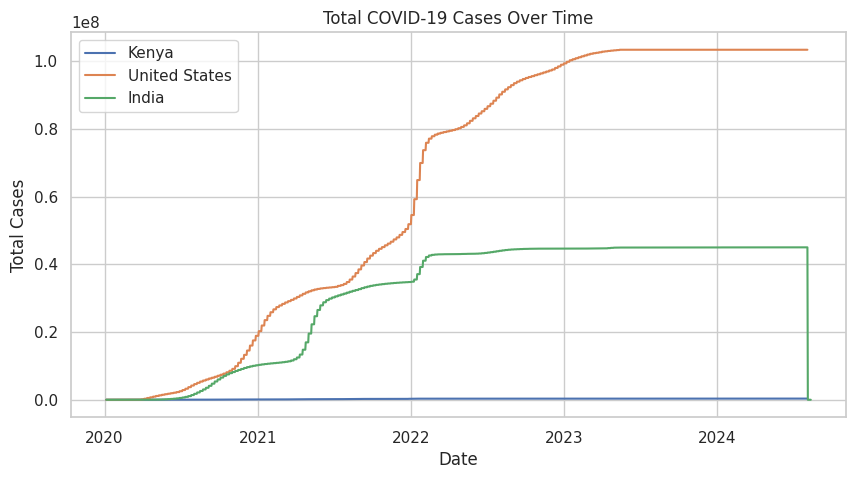

In [4]:
# Line plot: total cases over time
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


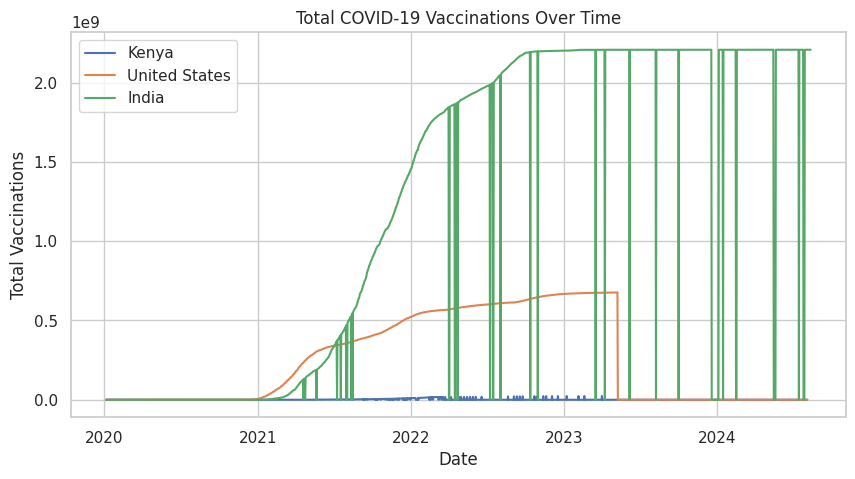

In [5]:
# Line plot: total vaccinations over time
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()


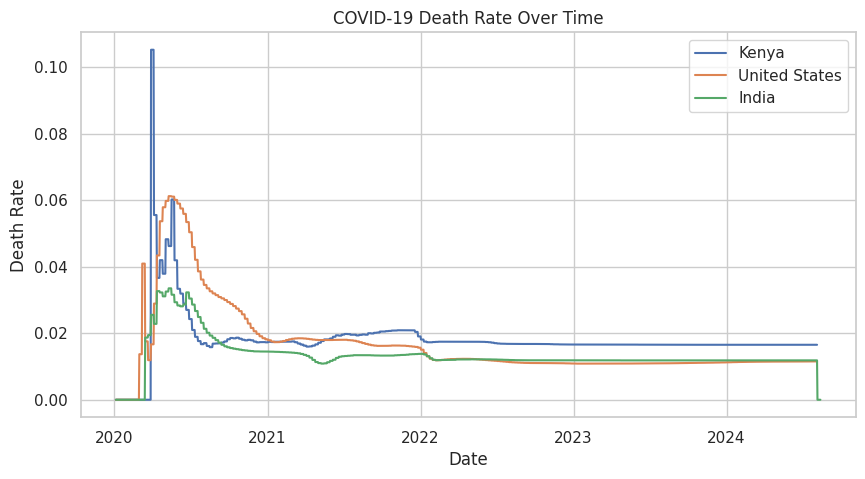

In [6]:
df['death_rate'] = df['total_deaths'] / df['total_cases']
df['death_rate'] = df['death_rate'].fillna(0)

# Plot death rate trends
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()


### Key Insights
- The U.S. had the highest number of cases among the selected countries.
- India saw a major spike in vaccinations starting mid-2021.
- Kenya had lower overall case counts but a relatively steady vaccination trend.
- Death rates stabilized over time for all countries.
